# Replication Carneiro & Heckman & Vytlacil 2011

This notebook replicates results from   

Carneiro, P., Heckman, J. J., & Vytlacil, E. J. (2011). [Estimating marginal returns to education.](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.101.6.2754)
*American Economic Review, 101*(6), 2754-81.

For this purpose we rely on *grmpy*. It is an open-source Python package for the simulation and estimation of the generalized Roy model. In addition it serves as a teaching tool to promote the conceptual framework of the generalized Roy model, illustrate a variety of issues in the econometrics of policy evaluation, and showcase basic software engineering practices.


# Motivation

The authors emphasize that the evaluation of marginal returns to policy interventions is one of the central tasks for evaluating the optimal size of social programs. They state that this is an relatively simple task if at least one of the following conditions is satisfied:

**1.) The effect of a policy intervention is homogeneous.**

**2.) The effect of a policy intervention is heterogeneous given observable variables but agent select not into treatment based on unobservable returns**

Under condition 1 or 2 it is possible to estimate the mean marginal return to schooling via a simplified mincer framework. Possible selection problems (the decision to attend schooling isn't exogenous) can be solved by applying methods like Instrumental variables. 
Nevertheless the application of empirically tests for this conditions provide evidence for heterogeneous marginal returns. In addition it seems like agents would select into treatment based on at least partly knowledge about idiosyncratic returns. Therefore the authors make use of a local instrumental variable approach to estimate the marginal return to college attendance within the framework of the generalized Roy model.


# Theoretical Framework

Since the current version of grmpy is not capable of estimating non-parametric versions of the Roy models, our
replication of Carneiro et al. (2011) focuses on reproducing the results for the linear-in-parameter version of the model. It is characterized by the following set of equations:

\begin{align*}
 &\textbf{Potential Outcomes} & & \textbf{Choice}  &\\
 & Y_1 = \delta_1 X + U_{1} &  &D^{*} = \gamma Z - V&\\
 & Y_0 = \delta_0 X + U_{0} &  &D_i = \mathbf{1}\{D^{*} >0\} =  \mathbf{1}\{\Phi(\gamma Z) > u_D\}&\\
&&& \text{with $u_D = \Phi(V)$}  &\\
&&&&\\
&\textbf{Distributional Characteristics}&&&\\
&\{U_{1}, U_{0}, V\} \sim \mathcal{N}\left(0, \Sigma\right)&&\Sigma =  \begin{bmatrix}
    \sigma_1^{2} & \sigma_{1,0} & \sigma_{1,V} \\
    \sigma_{1,0} & \sigma_0^{2} & \sigma_{0,V} \\
    \sigma_{1,V} & \sigma_{0,V} & \sigma_V^{2} \\
  \end{bmatrix}&\\
&&&&\\
& \textbf{Observed Outcome} &&&\\
& Y = D Y_1 + (1-D) Y_0 &&&
\end{align*}

$Y_1$ and $Y_0$  are objective outcomes associated with each potential treatment state $D$ and realized after the treatment decision.
From the perspective of the econometrician, $(X,Z)$ are observable while $(U_1,U_0,V)$ are not. $X$ are the observed determinants of potential outcomes $(Y_1,Y_0)$, and $Z$ are the observed determinants of the latent indicator variable $D^{*}$. It is assumed that the unobservable parameters $(U_1,U_0,V)$ follow a joint normal distribution with mean zero and covariance matrix $\Sigma$. 

$Y$ illustrates the observable outcome of the individual. Additionally its functional form emphasizes a crucial issue in the econometrics of policy evaluation which is referred to as the **Evaluation Problem**. The problem arises because the econometrician is limited to observe either $Y_1$ or $Y_0$ for the individual dependent on the selection decision $D$. Thus, the effect of treatment cannot be determined on an individual level. If the treatment choice $D$ depends on the potential outcomes, then there is also a selection problem (**Essential Heterogeneity**). If that is the case, then the treated and untreated sub populations differ not only in their treatment status but in other characteristics as well. A naive comparison of the treated and untreated leads to misleading conclusions.


# The Marginal Treatment Effect

The concept of the Marginal Treatment Effect, henceforth $B^{MTE}$, was first introduced by Björklund and Moffit (1987). It is defined as the gain from treatment to an indifferent individual given a specific degree of unobservable desire for selecting into treatment. Adding our functional form assumptions from above allows us to express $B^{MTE}$ via the following equation

\begin{align}
B^{MTE}(x,u_D) &= E\left[Y_1 - Y_0 | X=x, U_D = u_D\right]\\
& = \left(\delta_1 - \delta_0\right)x + \left(\sigma_{1,V} - \sigma_{0,V}\right) \phi^{-1}(u_D)\\
\end{align}

Note that $B^{MTE}$ does not assign explicitly one value as an effect, but rather provides a continuum of effects along the distribution of the unobservable parameter $V$. Additionally it provides the framework for deriving a broad variation of different treatment effects by applying effect specific weights along the distribution of $V$ on the marginal effect.


Next we import necessary packages:

In [1]:
%load_ext autoreload

import pandas as pd
import grmpy

from auxiliary.auxiliary import process_data
from auxiliary.auxiliary import plot_est_mte

Due to data privace issues, we are not able to merge the data provided by the authors so that they fully coincide with the original data set. Therefore our replication setup makes use of a mock data set. For this purpose we randomly merge the individual specific data with the local characteristics.

In [2]:
basic = pd.read_stata('data/basicvariables.dta')
local = pd.read_stata('data/localvariables.dta') 
df = pd.concat([basic, local], axis = 1)
process_data(df,'data/aer-replication-mock')

In the next step we have to create a initialization file that fully coincides with the setup by Carneiro et. al. (2011). The file is based on the information that the authors provide in their [online appendix](https://assets.aeaweb.org/assets/production/articles-attachments/aer/data/oct2011/20061111_app.pdf).

We then conduct an estimation based on the initialization file.

In [4]:
rslt = grmpy.fit('files/replication.grmpy.yml')

Next we plot the Marginal Treatment Effect based on our estimation results and compare it with the original values. 

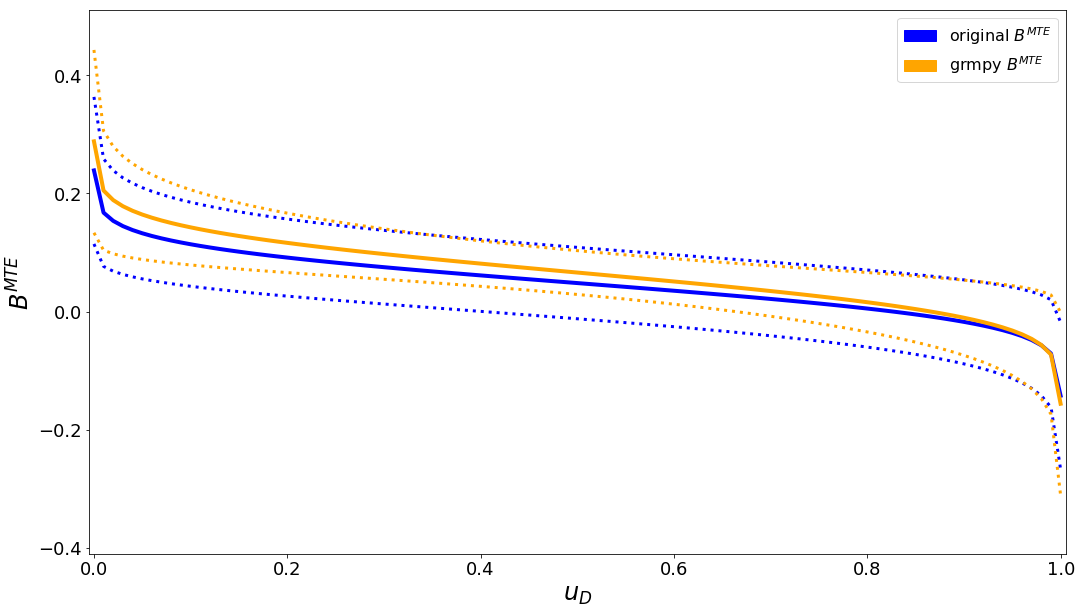

In [5]:
mte = plot_est_mte(rslt, 'files/replication.grmpy.yml')

# Results

The figure above presents $B^{MTE}$ as well as the associated 90% confidence interval. The y-axis shows the the marginal return for one year of college attendance evaluated on $x=E\left[X\right]$. The x-axis shows $u_D$, the corresponding quantile within the distribution of $V$ in which the individual's is located. Note that $V$ enters the choice equation with a negative sign. This means that agents with a relatively low value of $u_D$ are more likely to select into treatment compared to individuals with a high values. Accordingly the decreasing curve is a sign for selection on gains.

The graph also illustrates that the return to college attendance is subjected to a significant degree of heterogeneity along the distribution of the unobservable $V$. Individuals which are more likely to attend college (low values of $u_D$) are are able to realize returns up to $28\%$ per year. In contrary college attendance would actually harm individuals with a high values of $u_D$ because they face returns up to $-15\%$ per year.  


# References

- Abbring, J. H. & Heckman, J. J. (2007). [Econometric Evaluation of Social Programs, Part III: Distributional Treatment Effects, Dynamic Treatment Tffects, Dynamic Discrete Choice, and General Equilibrium Policy Evaluation.](https://www.sciencedirect.com/science/article/pii/S1573441207060722) *Handbook of Econometrics, Volume 6B*, Chapter 72, p. 5145-5303. Elsevier Science.


- Carneiro, P., Heckman, J. J., & Vytlacil, E. J. (2011). [Estimating marginal returns to education.](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.101.6.2754)
*American Economic Review, 101(6)*, 2754-81.


- Heckman, J. J., Schmierer D., & Urzua S. (2010). [Testing the Correlated Random Coefficient Model.](https://www.sciencedirect.com/science/article/pii/S0304407610000084) *Journal of Econometrics, 158(2)*, 177-203


- Heckman, J. J., & Vytlacil, E. J. (2005). [Structural Equations, Treatment Effects, and
Econometric Policy Evaluation.](https://www.jstor.org/stable/3598865?) *Econometrica, 73(3), 669-738.


- Heckman, J. J., Vytlacil., E. J. (2007). [Econometric Evaluation of Social Programs, Part I: Causal Models, Structural Models and Econometric Policy Evaluation.](https://www.sciencedirect.com/science/article/pii/S1573441207060709) In *Handbook of Econometrics*, Volume 6B, chapter 70, pages 4779–4874. Elsevier Science, 2007.


- Heckman, J. J. & Vytlacil, E. J. (2007). [Econometric Evaluation of Social Programs, Part II: Using the Marginal Treatment Effect to Organize Alternative Econometric Estimators to Evaluate Social Programs, and to Forecast their Effects in New Environments.](https://www.sciencedirect.com/science/article/pii/S1573441207060710) In *Handbook of Econometrics*, Volume 6B, chapter 71, pages 4875–5143. Elsevier Science.

